#### 决策树分类

+ 17个仿真数据
+ 使用信息熵选择划分属性(C4.5算法)，学习决策树

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

X = np.array([[0.697,0.460],[0.774,0.376],[0.634,0.264],[0.608,0.318],[0.556,0.215],[0.403,0.237],[0.481,0.149],[0.437,0.211],
              [0.666,0.091],[0.243,0.267],[0.245,0.057],[0.343,0.099],[0.639,0.161],[0.657,0.198],[0.360,0.370],[0.593,0.042],[0.719,0.103]])
y = np.array(['yes','yes','yes','yes','yes','yes','yes','yes','no','no','no','no','no','no','no','no','no'])

tree = DecisionTreeClassifier(max_depth=5,random_state=0,criterion='entropy')
tree.fit(X, y)

print("Predict on training set:", tree.predict(X))
print("Accuracy on training set:", tree.score(X, y))

Predict on training set: ['yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no']
Accuracy on training set: 1.0


**显示分类边界**

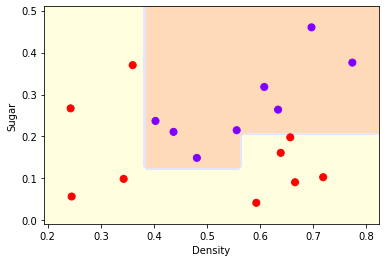

In [2]:
import matplotlib.pyplot as plt
from plot_decision_boundary import plot_decision_boundary

y[y=='yes'] = 0; y[y=='no'] = 1

eps = 0.05
x_min,x_max = X[:,0].min()-eps, X[:,0].max()+eps
y_min,y_max = X[:,1].min()-eps, X[:,1].max()+eps
tree = DecisionTreeClassifier(max_depth=5,random_state=0,criterion='entropy')
tree.fit(X, y)

plot_decision_boundary(tree,axis=[x_min,x_max,y_min,y_max])
plt.scatter(X[:,0], X[:,1], c=y.reshape(-1,1), s=50, cmap='rainbow')
plt.xlabel("Density"); plt.ylabel("Sugar")

plt.show()

**显示决策树结构**

+ 使用graphviz工具
     - sklearn输出.dot文件
     - graphviz显示决策树结构（<font color=red>需要安装graphviz软件</font>）

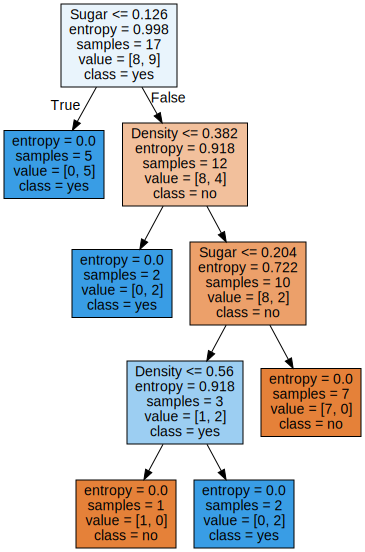

In [3]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree, out_file="tree.dot", class_names=['no','yes'],feature_names=np.array(['Density','Sugar']), impurity=True, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)
